In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('leg234_data.csv')
df.describe()


,LATITUDE,LONGITUD,PDMEAN,TOTAL,sf_depth,PCO2.H2O_mmm,PCO2.CO2_umm,NMEA.Humidity,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,day,month,time
count,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000,284572.000000
mean,16.301033,-46.967894,354.642920,46.511710,-3840.585156,0.560564,417.338777,75.491091,1012.629817,35.772758,94.976489,2.856091,-0.486586,28.138405,-0.156272,13.809992,9.200888,11.281751
std,10.524346,23.569258,207.618694,97.288380,1439.610435,1.085279,53.040203,6.523856,3.631861,0.460722,1.161525,44.681168,0.067906,1.547240,0.034713,6.264931,3.186138,6.851580
min,-23.194540,-85.073560,7.500000,0.000000,-7081.000000,-1.420000,-0.150000,43.691668,1006.279999,33.048000,89.375000,-0.460000,-0.520000,22.705000,-0.290000,1.000000,1.000000,0.000000
25%,11.757830,-75.105310,175.000000,3.650725,-4835.000000,0.380000,420.929993,74.657143,1011.134155,35.790001,94.834999,0.830000,-0.510000,28.100000,-0.165000,9.000000,10.000000,5.500000
50%,16.950700,-36.618310,355.000000,12.858050,-4094.000000,0.420000,425.709991,75.783337,1011.825012,35.825001,95.339996,0.910000,-0.505000,28.580000,-0.160000,13.000000,10.000000,11.000000
75%,22.389880,-28.668160,535.000000,43.687350,-3155.000000,0.535000,433.529999,77.392857,1012.756683,35.857500,95.514999,0.950000,-0.500000,28.845000,-0.150000,18.000000,11.000000,17.000000
max,35.436650,-16.889550,725.000000,999.928000,-10.000000,8.580000,500.100006,95.920238,1028.919678,36.740002,97.270000,2778.419922,0.875000,37.020000,0.240000,31.000000,12.000000,23.500000


Text(0, 0.5, 'Entries')

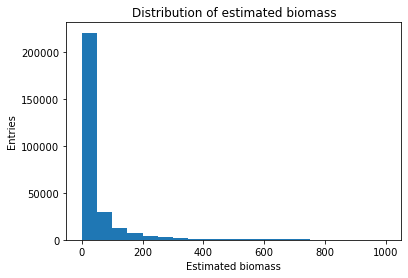

In [93]:
plt.hist(df['TOTAL'], 20)
plt.title('Distribution of estimated biomass')
plt.xlabel('Estimated biomass')
plt.ylabel('Entries')

In [3]:
y = df.iloc[:, df.columns == 'TOTAL']
X = df.iloc[:, df.columns != 'TOTAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
    test_size=0.5, random_state=123) 

In [4]:
X_train

,LATITUDE,LONGITUD,PDMEAN,sf_depth,PCO2.H2O_mmm,PCO2.CO2_umm,NMEA.Humidity,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,day,month,time
38405,20.67481,-23.54641,125.0,-4616.0,-0.90,250.220003,86.815475,1011.630005,36.246500,95.370003,0.610000,-0.500,26.580000,-0.195,8,10,22.0
100085,11.75582,-35.51213,135.0,-5209.0,-1.05,219.679993,75.091667,1010.748505,35.828999,95.360001,0.840000,-0.510,28.565000,-0.170,15,10,7.0
42825,19.74728,-24.08526,475.0,-4289.0,0.55,458.520004,85.816666,1011.656097,36.183498,95.110001,0.640000,-0.510,27.150000,-0.170,9,10,8.5
154278,14.30372,-72.05142,425.0,-3438.0,0.42,425.709991,75.783337,1011.825012,35.825001,95.339996,0.910000,-0.505,28.580000,-0.160,10,11,15.0
173839,18.89527,-79.60706,335.0,-5002.0,0.42,425.709991,75.783337,1011.825012,35.825001,95.339996,0.910000,-0.505,28.580000,-0.160,19,11,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,21.14770,-83.36893,495.0,-4455.0,0.42,425.709991,75.783337,1011.825012,35.825001,95.339996,0.910000,-0.505,28.580000,-0.160,21,11,21.0
17730,24.20022,-19.97779,75.0,-3773.0,3.83,467.790009,81.330002,1014.854645,36.623001,95.834999,0.600000,-0.510,25.709999,-0.180,7,10,5.0
28030,22.50206,-21.82851,135.0,-4554.0,0.42,425.709991,75.783337,1011.825012,35.825001,95.339996,0.910000,-0.505,28.580000,-0.160,8,10,1.5
277869,-17.37625,-36.12143,135.0,-3986.0,0.42,425.709991,76.771427,1010.016144,36.072500,93.704998,-0.390000,-0.450,28.730000,-0.160,16,2,10.0


In [11]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=0)

In [8]:
def smape(A, F):
    return 1/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def predict_and_score(X_val, y_val, forest):
    forest_pred = forest.predict(X_val)
    print('MAE score: ', mean_absolute_error(y_val, forest_pred))
    print('R2 score: ', r2_score(y_val, forest_pred))
    print('Smape score: ', smape(y_val, forest_pred.reshape(len(X_val),1)))

In [6]:
print('Parameters currently in use:\n')
print(forest.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [9]:
predict_and_score(X_val, y_val, forest)

MAE score:  15.857300722327642
R2 score:  0.7263983024002176
Smape score:  TOTAL    0.315668
dtype: float64


In [10]:
predict_and_score(X_test, y_test, forest)

MAE score:  15.9188428168289
R2 score:  0.6964564703775868
Smape score:  TOTAL    0.319092
dtype: float64


In [6]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10, 50, 100, 200, 300, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100, 200, 300, 500]}

{'n_estimators': [10, 50, 100, 200, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100, 200, 300, 500]}

In [7]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=2)

In [8]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [9]:
best_random = rf_random.best_estimator_

In [14]:
r_pred = best_random.predict(X_val)
print('MAE score: ', mean_absolute_error(y_val, r_pred))
print('R2 score: ', r2_score(y_val, r_pred))
print('Smape score: ', smape(y_val, r_pred.reshape(28458,1)))

MAE score:  15.985043555035002
R2 score:  0.7350629556242643
Smape score:  TOTAL    0.340018
dtype: float64


In [12]:
X_val

,LATITUDE,LONGITUD,PDMEAN,sf_depth,PCO2.H2O_mmm,PCO2.CO2_umm,NMEA.Humidity,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,day,month,time
65521,15.89493,-27.73201,585.0,-4926.0,0.53,439.130005,74.178570,1013.101562,35.825001,95.339996,0.910,-0.505,28.580,-0.160,11,10,16.0
119833,11.73894,-40.23828,535.0,-4676.0,0.38,433.160004,79.770000,1011.135254,35.858000,95.975002,0.905,-0.510,28.915,-0.155,17,10,1.5
111843,11.72716,-38.29062,635.0,-4900.0,0.38,422.464996,72.566669,1011.630829,35.827499,95.589996,0.900,-0.510,29.020,-0.165,16,10,5.5
239836,35.08712,-74.19599,645.0,-3173.0,0.83,371.769989,52.913095,1028.244629,36.063999,93.314999,2.395,-0.510,23.600,-0.165,15,12,6.5
240818,35.32031,-74.19754,385.0,-3030.0,-0.52,220.380005,55.283335,1028.919678,36.035999,92.974998,2.400,-0.500,23.695,-0.190,15,12,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133356,11.74338,-43.42786,325.0,-3131.0,-1.14,418.789993,80.066666,1010.421997,35.363998,96.110001,0.950,-0.510,29.260,-0.190,18,10,13.0
240850,35.32031,-74.19754,705.0,-3030.0,-0.52,220.380005,55.283335,1028.919678,36.035999,92.974998,2.400,-0.500,23.695,-0.190,15,12,8.5
16278,24.51596,-19.78495,335.0,-3595.0,0.42,425.709991,77.653332,1015.848419,35.825001,95.339996,0.910,-0.505,28.580,-0.160,7,10,1.5
178724,19.36562,-80.69148,575.0,-2679.0,0.42,425.709991,75.783337,1011.825012,35.825001,95.339996,0.910,-0.505,28.580,-0.160,20,11,6.5


In [ ]:
clf = RandomForestRegressor(n_estimators=50, random_state=0, criterion='mae')

In [ ]:
clf.fit(X_train, y_train.values.ravel())

In [ ]:
clf_pred = clf.predict(X_val)
print('MAE score: ', mean_absolute_error(y_val, clf_pred))
print('R2 score: ', r2_score(y_val, clf_pred))
print('Smape score: ', smape(y_val, clf_pred.reshape(41194,1)))

# Creating different datasets
### North and South Atlantic
### Max 600m depth
### Keep rows with some NaNs (remove harbour dates and where all values are NaN

In [34]:
# Filter original dataframe. Return dataframe where lat / long is higher than given
def df_by_position(df, min_lat = None, max_lat = None, min_long = None, max_long = None):
    if min_lat:
        df = df[df['LATITUDE'] >= min_lat] 
    if min_long: 
        df = df[df['LONGITUD'] >= min_long] 
    if max_lat:
        df = df[df['LATITUDE'] <= max_lat] 
    if max_long:
        df = df[df['LONGITUD'] <= max_long] 
    return df

# Return df with max depth given
def df_by_depth(df, max_depth = None):
    if max_depth:
        df = df[df['PDMEAN'] <= max_depth] 
    return df

def df_specific_depth(df, depth):
    df = df[df['PDMEAN'] == depth] 
    df = df[['LATITUDE','LONGITUD','PDMEAN', 'TOTAL']]
    return df

In [35]:
mid_atlantic = df_by_position(df, min_lat = -3, max_lat = 15, min_long = -44, max_long = -28)
carib = df_by_position(df, min_lat = 15, max_lat = 25, min_long = -85, max_long = -70)
fifty = df_by_depth(df, 50)
twohundred = df_by_depth(df, 200)
south = df_by_position(df, max_lat=1)

depth = df_specific_depth(df, 545)


In [ ]:
depth = gpd.GeoDataFrame(
    depth, geometry=gpd.points_from_xy(depth.LATITUDE, depth.LONGITUD))

depth.reset_index(level=0, inplace=True)

depth['date'] = depth['date'].astype(str)

depth = depth.dropna()

In [ ]:
depth

In [ ]:
#fig = px.scatter_geo(depth,lat='LATITUDE',lon='LONGITUD', hover_name="TOTAL")
fig = px.scatter_geo(depth,
                    lat=depth.geometry.x,
                    lon=depth.geometry.y,
                    color="TOTAL",
                    size='TOTAL',
                    hover_data=['TOTAL', 'date'])
fig.update_geos(
    center=dict(lon=-30, lat=10),
    lataxis_range=[-30,30], lonaxis_range=[-100, 50]
)
fig.update_layout(title = 'Biomass at 545 meters depth', title_x=0.5, height=500,
                 )
fig.show()



In [39]:
def split_data(df):
    y = df.iloc[:, df.columns == 'TOTAL']
    X = df.iloc[:, df.columns != 'TOTAL']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.5, random_state=123) 
    

    return X_train, X_val, y_train, y_val

In [40]:
def fit_forest(X_train, y_train):
    forest = RandomForestRegressor(random_state=0)
    forest.fit(X_train, y_train.values.ravel())
    return forest

In [70]:
X_train, X_val, y_train, y_val = split_data(south)
forest = fit_forest(X_train, y_train)

In [71]:
predict_and_score(X_val, y_val, forest)

MAE score:  20.511778801813147
R2 score:  0.7209072738978521
Smape score:  TOTAL    0.403735
dtype: float64


In [74]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

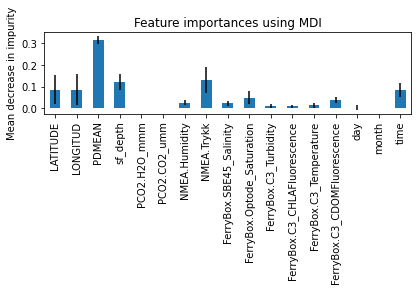

In [75]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [76]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_val, y_val, n_repeats=10, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

Elapsed time to compute the importances: 18.987 seconds


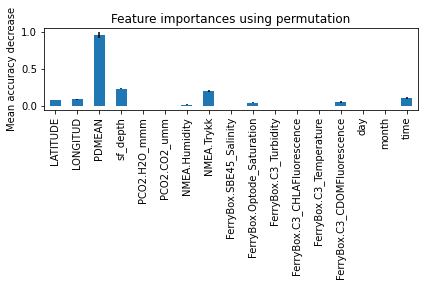

In [77]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()